In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm

In [2]:
train=pd.read_csv('train.csv') 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

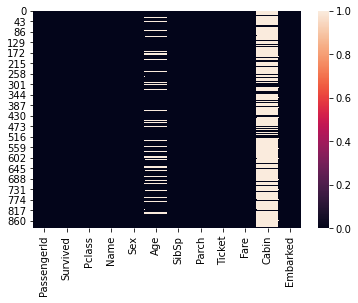

In [5]:
sns.heatmap(train.isnull())

In [6]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train['Embarked'].fillna('S',inplace=True)

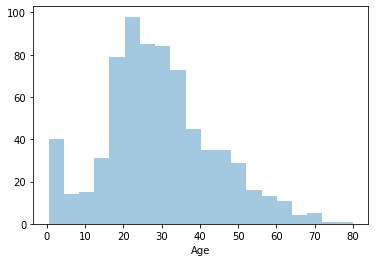

In [12]:
sns.distplot(train['Age'],kde=False)

In [13]:
train['Age'].fillna(28,inplace=True)

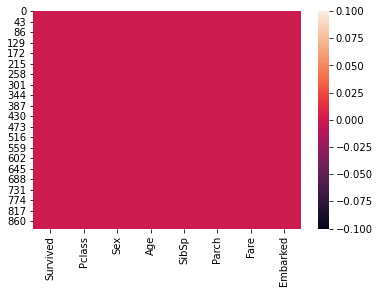

In [14]:
sns.heatmap(train.isnull())

In [15]:
train.duplicated().sum()

116

In [16]:
train.drop_duplicates(keep='first',inplace=True)

In [17]:
train.duplicated().sum()

0

In [18]:
train.shape

(775, 8)

In [19]:
train.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            879, 880, 881, 882, 883, 885, 887, 888, 889, 890],
           dtype='int64', length=775)

In [20]:
train.reset_index(drop=True,inplace=True)

In [21]:
train.index

RangeIndex(start=0, stop=775, step=1)

In [22]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.331388,-0.078114,-0.037841,0.069864,0.247159
Pclass,-0.331388,1.000000,-0.342745,0.087050,0.038998,-0.554649
Age,-0.078114,-0.342745,1.000000,-0.279316,-0.182697,0.092503
SibSp,-0.037841,0.087050,-0.279316,1.000000,0.379535,0.133807
Parch,0.069864,0.038998,-0.182697,0.379535,1.000000,0.190823
Fare,0.247159,-0.554649,0.092503,0.133807,0.190823,1.000000


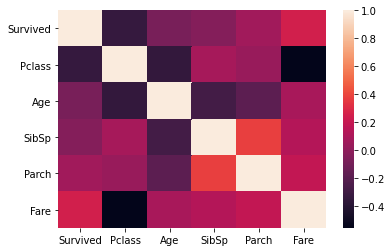

In [24]:
sns.heatmap(train.corr())

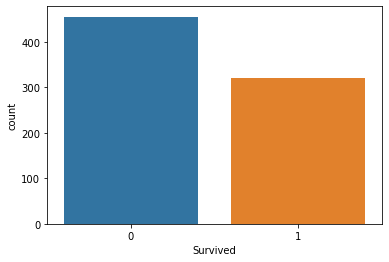

In [25]:
sns.countplot('Survived',data=train)

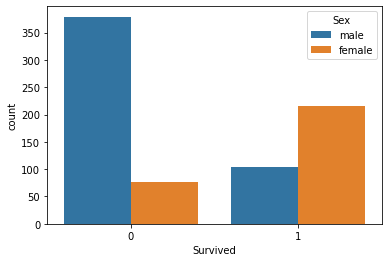

In [26]:
sns.countplot(x='Survived',hue='Sex',data=train)

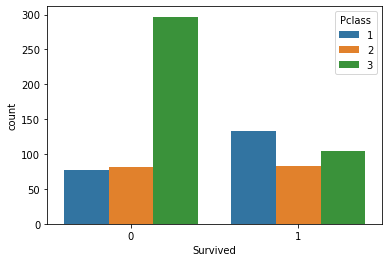

In [27]:
sns.countplot(x='Survived',hue='Pclass',data=train)

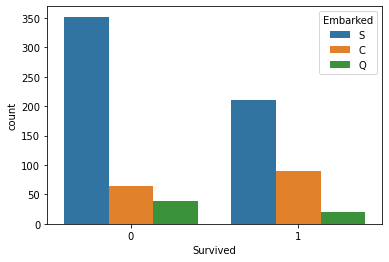

In [28]:
sns.countplot(x='Survived',hue='Embarked',data=train)

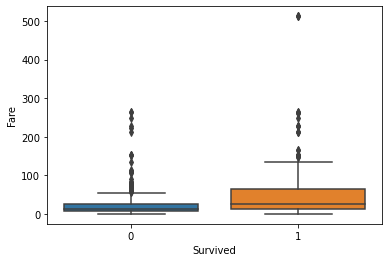

In [29]:
sns.boxplot(x='Survived',y='Fare',data=train)

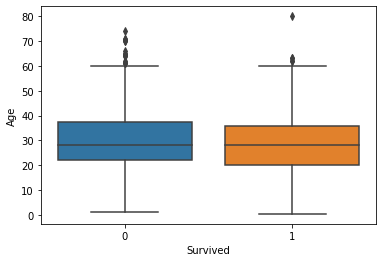

In [30]:
sns.boxplot(x='Survived',y='Age',data=train)

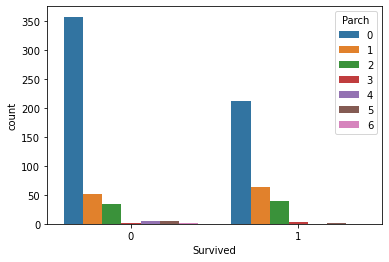

In [31]:
sns.countplot(x='Survived',hue='Parch',data=train)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


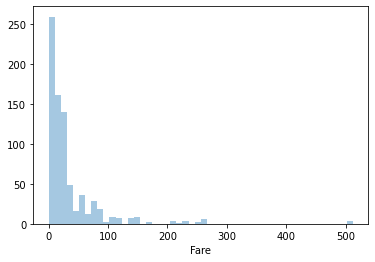

In [33]:
sns.distplot(train['Fare'],kde=False)

In [34]:
le=LabelEncoder()
for i in ['Sex','Embarked']:
    train[i]=le.fit_transform(train[i])

In [35]:
X=train.drop(['Survived'],axis=1)

In [36]:
y=train['Survived']

In [37]:
X=np.array(X)
y=np.array(y)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
def accuracy(modelname):
    modelb=modelname
    modelb.fit(X_train,y_train)
    pred=modelb.predict(X_test)
    print(accuracy_score(y_test,pred)*100)
    print(metrics.classification_report(y_test,pred))

In [40]:
accuracy(LogisticRegression(solver='liblinear'))

80.0
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        97
           1       0.72      0.76      0.74        58

    accuracy                           0.80       155
   macro avg       0.79      0.79      0.79       155
weighted avg       0.80      0.80      0.80       155



In [41]:
accuracy(svm.SVC())

71.61290322580646
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        97
           1       0.72      0.40      0.51        58

    accuracy                           0.72       155
   macro avg       0.72      0.65      0.66       155
weighted avg       0.72      0.72      0.69       155



In [42]:
accuracy(neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform'))

74.19354838709677
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        97
           1       0.70      0.55      0.62        58

    accuracy                           0.74       155
   macro avg       0.73      0.70      0.71       155
weighted avg       0.74      0.74      0.73       155



In [43]:
accuracy(RandomForestClassifier(n_estimators=30))

78.70967741935485
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.70      0.74      0.72        58

    accuracy                           0.79       155
   macro avg       0.77      0.78      0.77       155
weighted avg       0.79      0.79      0.79       155



In [44]:
accuracy(DecisionTreeClassifier())

74.19354838709677
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        97
           1       0.64      0.72      0.68        58

    accuracy                           0.74       155
   macro avg       0.73      0.74      0.73       155
weighted avg       0.75      0.74      0.74       155



In [45]:
model=LogisticRegression(solver='liblinear')

In [70]:
model.fit(X_test,y_test)

LogisticRegression(solver='liblinear')

In [47]:
test=pd.read_csv('test.csv')

In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [51]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [50]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [57]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [58]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
test.duplicated().sum()

41

In [61]:
test.drop_duplicates(keep='first',inplace=True)

In [62]:
test.duplicated().sum()

0

In [63]:
test.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            405, 406, 407, 408, 409, 411, 412, 414, 415, 417],
           dtype='int64', length=377)

In [64]:
test.reset_index(drop=True,inplace=True)

In [65]:
le=LabelEncoder()
for i in ['Sex','Embarked']:
    test[i]=le.fit_transform(test[i])

In [66]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [77]:
predictions=model.predict(test)

In [78]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,